In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


         Date Store_ID Product_Category  Units_Sold  Unit_Price     Sales
0  2023-01-01       S3         Clothing          44      574.19  25264.36
1  2023-01-02       S1         Clothing          15      764.83  11472.45
2  2023-01-03       S3          Grocery          91      878.00  79898.00
3  2023-01-04       S3         Clothing          78      348.66  27195.48
4  2023-01-05       S1          Grocery          56      823.04  46090.24
Summary Stats:
        Units_Sold  Unit_Price         Sales
count  365.000000  365.000000    365.000000
mean    53.200000  502.341589  27012.227918
std     26.426157  291.871658  21974.865317
min     10.000000   14.590000    418.950000
25%     31.000000  238.760000   8816.730000
50%     54.000000  501.400000  21709.440000
75%     75.000000  760.660000  39732.000000
max     99.000000  997.950000  97143.480000

Data Types:
 Date                 object
Store_ID             object
Product_Category     object
Units_Sold            int64
Unit_Price        

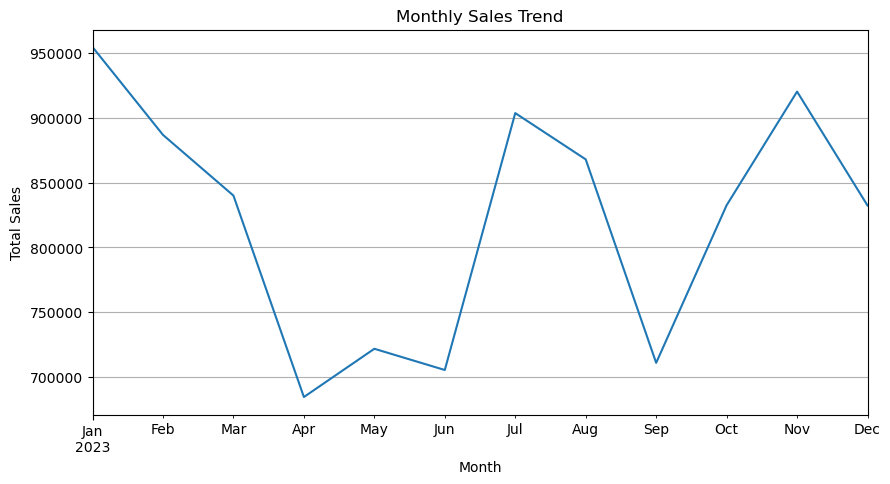

Mean Squared Error: 561737907.9891812


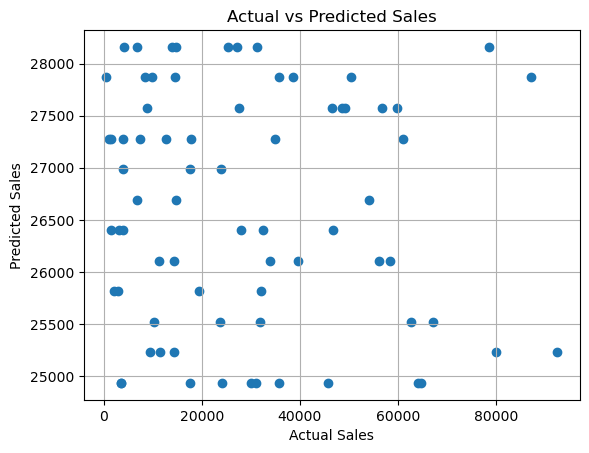

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/Users/ankushrameshnikam/Downloads/sales_data.csv')
print(df.head())

df.dropna(inplace=True)  

print("Summary Stats:\n", df.describe())
print("\nData Types:\n", df.dtypes)

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


df['Month'] = df['Date'].dt.month
X = df[['Month']]  
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
